# Student alcohol consumption
Marco Spanò (s1045892) - Peter Horvath (s1042834)

### Problem:

Alcohol has a bad influence on human life. Despite this, alcoholic drinks are nowadays really
common, especially in teenagers’ life that are the ones who suffer the most from the
consequences of it (the effects alcohol has on the brain and everyday’s life).
The dataset we found contains records of students in secondary school that attended math
and portuguese language courses with 33 attributes regarding personal info, alcohol
consumption, grades and more.
Starting from this dataset we are going to make inferences such as the level of alcohol
consumption of a student (based on the other columns) or predicting the grades he/she will
get. Furthermore, we can also explore some characteristics of the dataset, like inspecting
how alcohol influences the grades of a student.
Finally we can try to compare these results with other’s taken from other similar dataset
(students from different countries or older/younger) and see if there is correlation from them.
Dataset: https://www.kaggle.com/uciml/student-alcohol-consumption#student-mat.csv

### Our solution:

Our first aim is to start applying a decision tree classifier (and later on also a random forest)
on the dataset since it is easily understandable and as well as having a good classifier we
can also see which are the variables that most affect the final result.
Secondly we will apply a naive bayes classifier to compare the results we get from the
decision tree to it. Also with the naive classifier we can try to inspect which attributes
contribute the most to predict the outcome.
Eventually we can try to apply a small neural network on the dataset and see if it we can
achieve a better accuracy, even if the dataset is not so big and the probability of it are low.

### Literature:

Paper from the researchers who shared the dataset:
https://bradzzz.gitbooks.io/ga-seattle-dsi/dsi/dsi_05_classification_databases/2.1-lesson/assets/datasets/STUDENT%20ALCOHOL%20CONSUMPTION.pdf

A study on alcohol consumption of undergraduate students in the UK in 2000-2001:
https://bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-8-163
A similar study also in UK during 2008-2009:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3843305/

# Dataset

Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
%matplotlib inline

#reading the two csv files and merging them with 'append'
data_mat = pd.read_csv('student-mat.csv')
data_por = pd.read_csv('student-por.csv')
merged = data_mat.append(data_por)

column_names = merged.columns
classNames = merged.G3.unique()
classNames = np.sort(classNames)

features = merged.columns


#we have to use certain columns for removing duplicates (not all of the columns), the column names are given in the .R file
column_names_for_subsetting = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]
merged = merged.drop_duplicates(subset = column_names_for_subsetting).values

print(data_mat.shape)
print(data_por.shape)
print(merged)

(395, 33)
(649, 33)
[['GP' 'F' 18 ... 5 6 6]
 ['GP' 'F' 17 ... 5 5 6]
 ['GP' 'F' 15 ... 7 8 10]
 ...
 ['MS' 'F' 18 ... 16 15 15]
 ['MS' 'F' 19 ... 7 8 9]
 ['MS' 'F' 17 ... 6 9 11]]


Merging the two parts of the dataset

In [2]:
# creating a categorical encoder with the indices list
# the encoder will encode only those columns which are in the indices
indices = [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22]
encoder = ce.ordinal.OrdinalEncoder(cols = indices)

#encoding the selected columns
#the encoder returns a pandas dataframe so we have to use the 'values' again to get the values in a numpy array
merged = encoder.fit_transform(merged)
merged = merged.values
print(merged)




[[ 1  1 18 ...  5  6  6]
 [ 1  1 17 ...  5  5  6]
 [ 1  1 15 ...  7  8 10]
 ...
 [ 2  1 18 ... 16 15 15]
 [ 2  1 19 ...  7  8  9]
 [ 2  1 17 ...  6  9 11]]


Plot of each features on the grades of students, to visible see if there is correlation and on which variable.

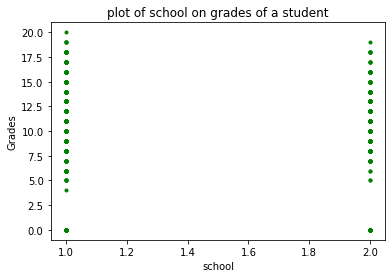

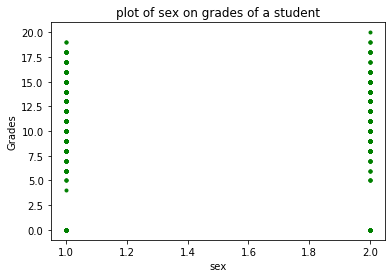

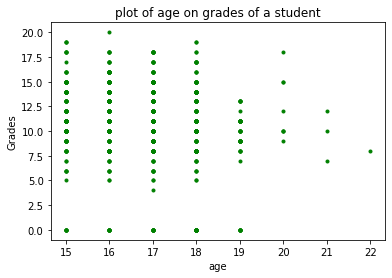

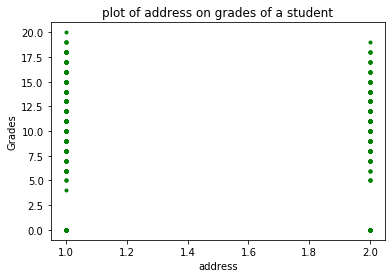

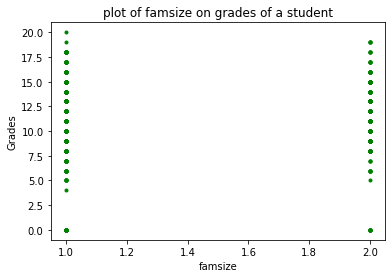

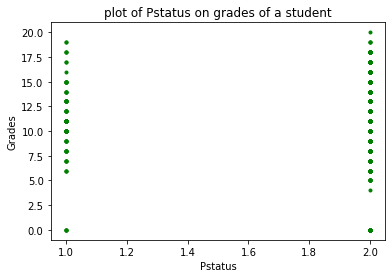

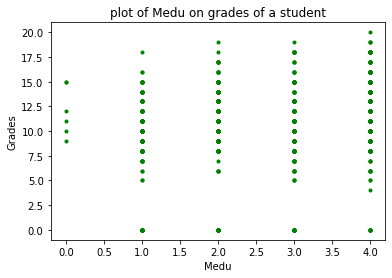

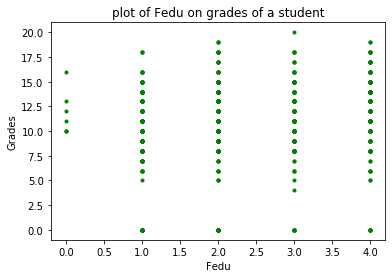

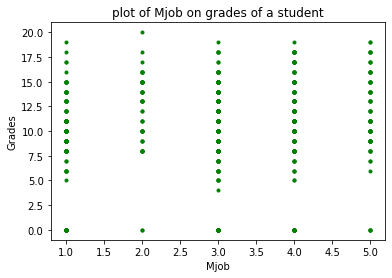

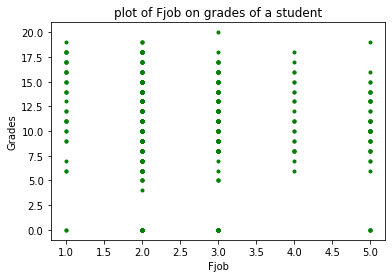

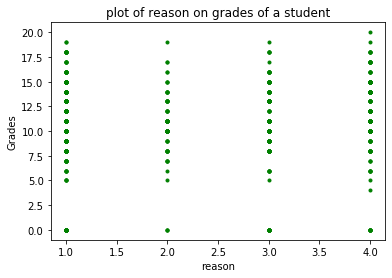

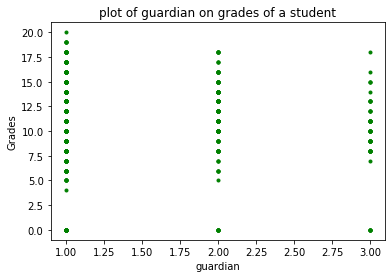

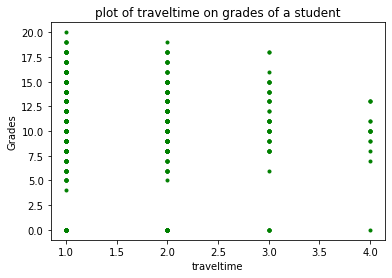

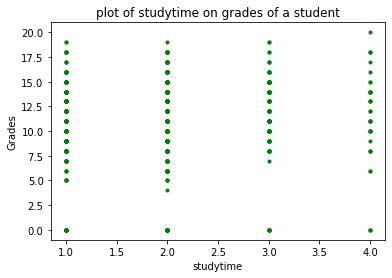

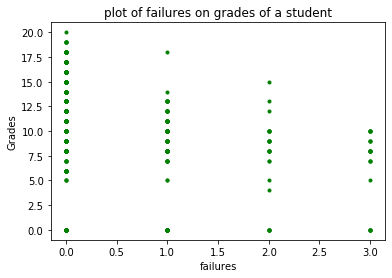

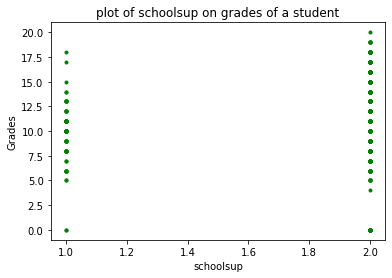

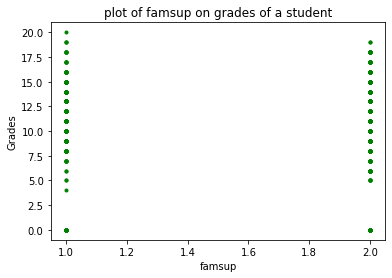

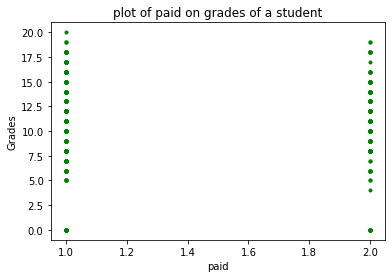

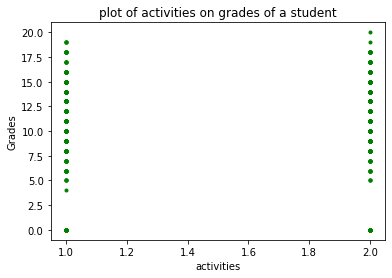

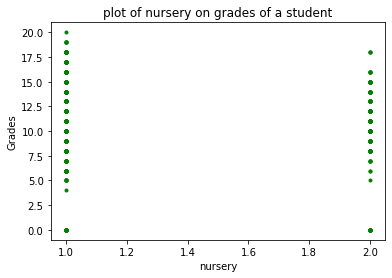

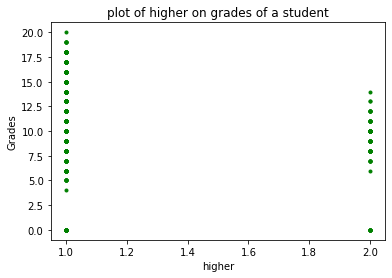

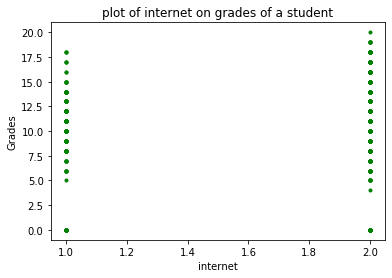

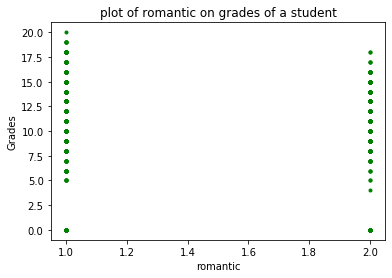

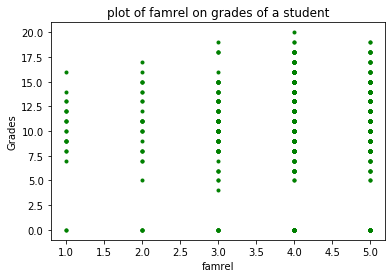

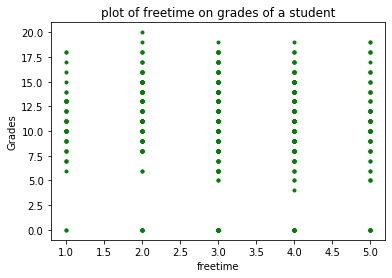

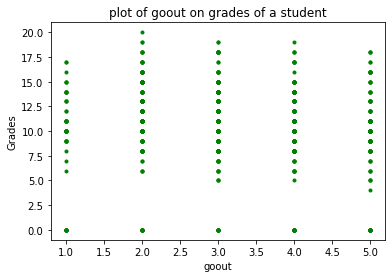

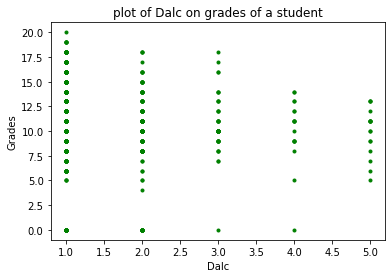

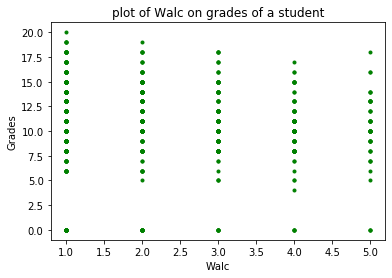

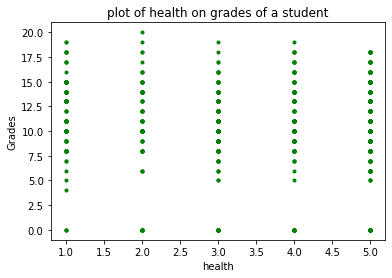

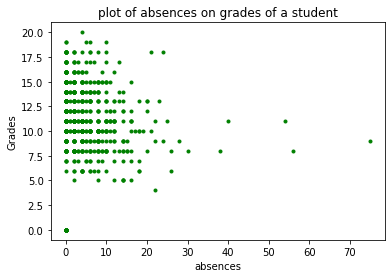

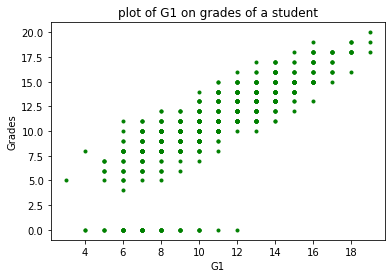

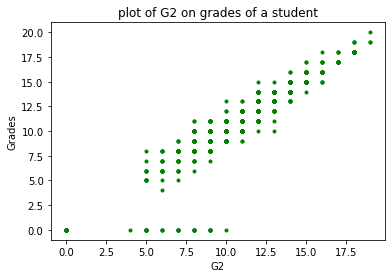

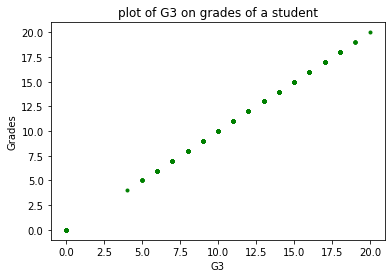

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(0,33):
    plt.plot(merged[:, i], merged[:, 32], 'g.')
    plt.xlabel(column_names[i])
    plt.ylabel('Grades')
    plt.title(f'plot of {column_names[i]} on grades of a student')
    plt.show()


plt.tight_layout()
plt.show()

# Preprocessing

deleting possible outliers, the one with grade 0

In [5]:
merged = merged[merged[:,32] > 0, :]
print(merged)

[[ 1  1 18 ...  5  6  6]
 [ 1  1 17 ...  5  5  6]
 [ 1  1 15 ...  7  8 10]
 ...
 [ 2  1 18 ... 16 15 15]
 [ 2  1 19 ...  7  8  9]
 [ 2  1 17 ...  6  9 11]]


Code if we need a standardized dataset

In [32]:
merged_std = (merged - np.mean(merged, axis=0)) / np.std(merged, axis=0)
print(merged_std)

[[-0.72870939 -0.84210526  0.96238353 ... -1.98058448 -1.74256804
  -1.82898916]
 [-0.72870939 -0.84210526  0.17066268 ... -1.98058448 -2.07803278
  -1.82898916]
 [-0.72870939 -0.84210526 -1.41277902 ... -1.31716394 -1.07163857
  -0.50057679]
 ...
 [ 1.37228917 -0.84210526  0.96238353 ...  1.66822846  1.27661459
   1.15993868]
 [ 1.37228917 -0.84210526  1.75410438 ... -1.31716394 -1.07163857
  -0.83267988]
 [ 1.37228917 -0.84210526  0.17066268 ... -1.64887421 -0.73617383
  -0.16847369]]


Code if we need a normalized dataset

In [33]:
from sklearn.preprocessing import normalize

merged_norm = normalize(merged, axis=0)

# Dividing into training and test sets

In [6]:
import sklearn.model_selection as skl

#shows how much data you want to put in the testing dataset, the rest goes to the training one
holdout = 0.3

#use the same seed for all the depths
random_seed = 0

X = merged[:, :30]
regr_y = merged[:, 32]
y = merged[:, 32] >= 10


print(X.shape, y.shape)
print("people who reaches a sufficient grade: ", np.count_nonzero(y==True), "People who doesn't", np.count_nonzero(y==False))
print("classifier that answer everytime 'yes': ", np.count_nonzero(y==True)/617)
X_train, X_test, y_train, y_test = skl.train_test_split(X, y, test_size=holdout, stratify=y, random_state=random_seed)
RX_train, RX_test, Ry_train, Ry_test = skl.train_test_split(X, regr_y, test_size=holdout, random_state=random_seed)

(617, 30) (617,)
people who reaches a sufficient grade:  467 People who doesn't 150
classifier that answer everytime 'yes':  0.7568881685575365


In this case, deciding whether a student achievesa sufficient grade is an unbalanced problem because most of the students (3 out of 4) reached a sufficient score. We have to take this into account because a classifier can learn to say  "yes" every time performing a 75% of accuracy.

# PCA 

Applying PCA algorithm to find if some clusters are defined inside the dataset, especially marking sufficient grade in green and insufficient with black.

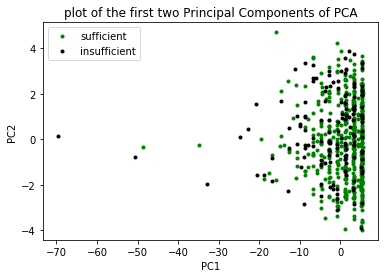

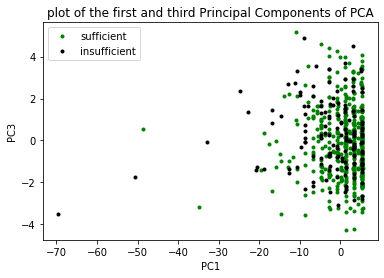

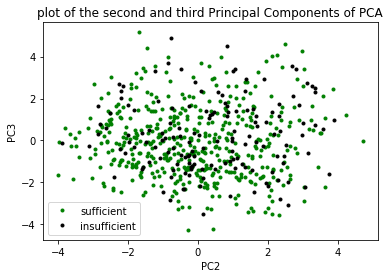

In [61]:
X = merged[:, :30]
#target = merged[:, 32]

target = merged[:,32] >= 10
#print(merged[:,32], target)

mean = np.mean(X, axis=0)

Y = X - mean

U, S, VT = np.linalg.svd(Y)


V = VT.T
#print(V.shape)
Z = np.dot(Y, V)

plt.plot(Z[target==True, 0], Z[target==True, 1],'g.', label="sufficient")
plt.plot(Z[target==False, 0], Z[target==False, 1],'k.', label="insufficient")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('plot of the first two Principal Components of PCA')
plt.legend()
plt.show()

plt.plot(Z[target==True, 0], Z[target==True, 2],'g.', label="sufficient")
plt.plot(Z[target==False, 0], Z[target==False, 2],'k.', label="insufficient")
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('plot of the first and third Principal Components of PCA')
plt.legend()
plt.show()

plt.plot(Z[target==True, 1], Z[target==True, 2],'g.', label="sufficient")
plt.plot(Z[target==False, 1], Z[target==False, 2],'k.', label="insufficient")
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('plot of the second and third Principal Components of PCA')
plt.legend()
plt.show()

# Decision Tree Classifier

Binary problem, using sufficient grades ['yes', 'no'] as target variable

In [13]:
from sklearn import tree
from Toolbox.treeprint import tree_print
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

clf = tree.DecisionTreeClassifier(criterion = 'gini', splitter='random', random_state=0,min_samples_leaf=10, max_depth=5, class_weight='balanced')
clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print("score for the decision tree: ")
print(score)

print("\nconfusion matrix")
print(confusion_matrix(y_test, clf.predict(X_test)))

score for the decision tree: 
0.7795698924731183

confusion matrix
[[ 21  24]
 [ 17 124]]


Decision Tree Classifier seems good, with a 78% of accuracy and a balanced confusion matrix (is not predicting more a class than another). Let's plot it to inspect it.

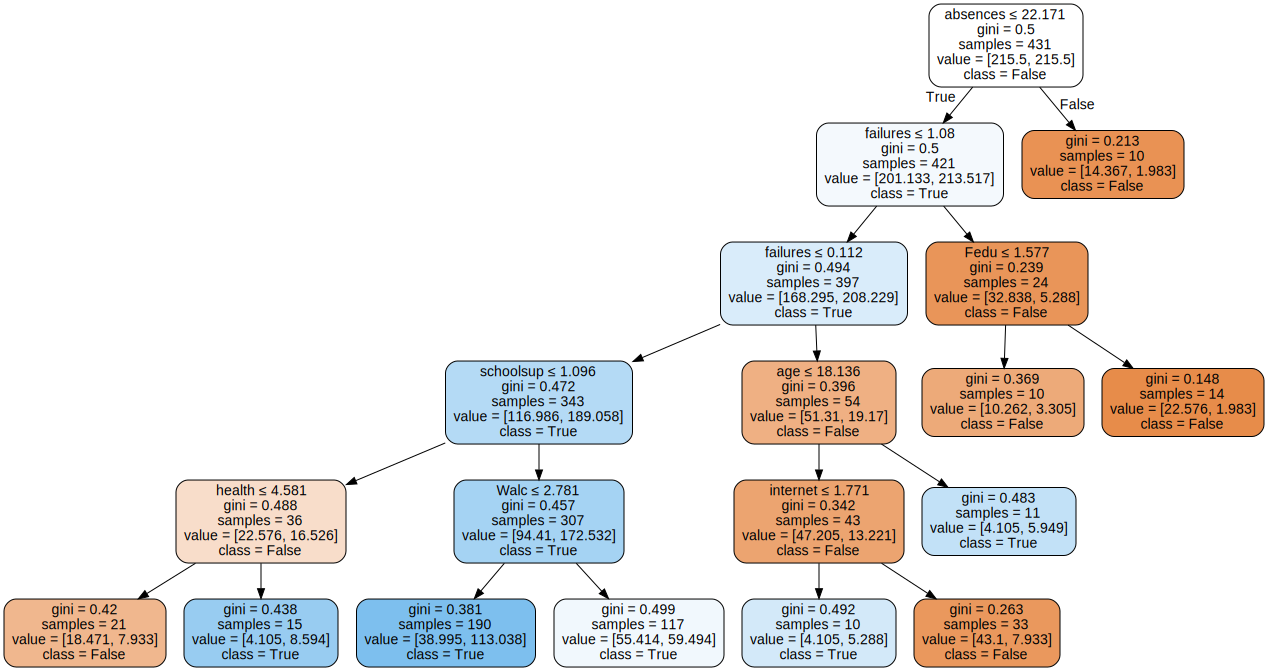

In [14]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file="tree.dot", 
                     feature_names=column_names[:30],  
                     class_names=['True', 'False'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=column_names[:30],  
                     class_names=['False', 'True'],  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = graphviz.Source(dot_data)  
graph

Analyzing the problem using a regression on the original target variable. We will use holdout cross-validation to find the best depth where we can prone the tree.

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

err_train = np.zeros(21)
err_test = np.zeros(21)

for i in range(2, 21):
    clf = DecisionTreeRegressor(max_depth=i, splitter="random",min_samples_leaf=10, random_state=0)
    clf = clf.fit(RX_train, Ry_train)
    err_train[i] = clf.score(RX_train, Ry_train)
    err_test[i] = clf.score(RX_test, Ry_test)
    print("\ndepth of the tree:", clf.get_depth())
    print("error on the training set:", err_train[i])
    print("error on the testing set:", err_test[i])


depth of the tree: 2
error on the training set: 0.08915616014939398
error on the testing set: 0.08909711925095987

depth of the tree: 3
error on the training set: 0.12122232117546716
error on the testing set: 0.13485108587522054

depth of the tree: 4
error on the training set: 0.16089801867717568
error on the testing set: 0.222820176605514

depth of the tree: 5
error on the training set: 0.190670566399062
error on the testing set: 0.15754150691535115

depth of the tree: 6
error on the training set: 0.2223847552036867
error on the testing set: 0.1452155981145402

depth of the tree: 7
error on the training set: 0.26684157954886834
error on the testing set: 0.12290976837326917

depth of the tree: 8
error on the training set: 0.2839669373333486
error on the testing set: 0.11375623470890461

depth of the tree: 9
error on the training set: 0.324731002449245
error on the testing set: 0.1009181821688363

depth of the tree: 10
error on the training set: 0.3544844608021407
error on the testing 

Plotting errors during training and testing

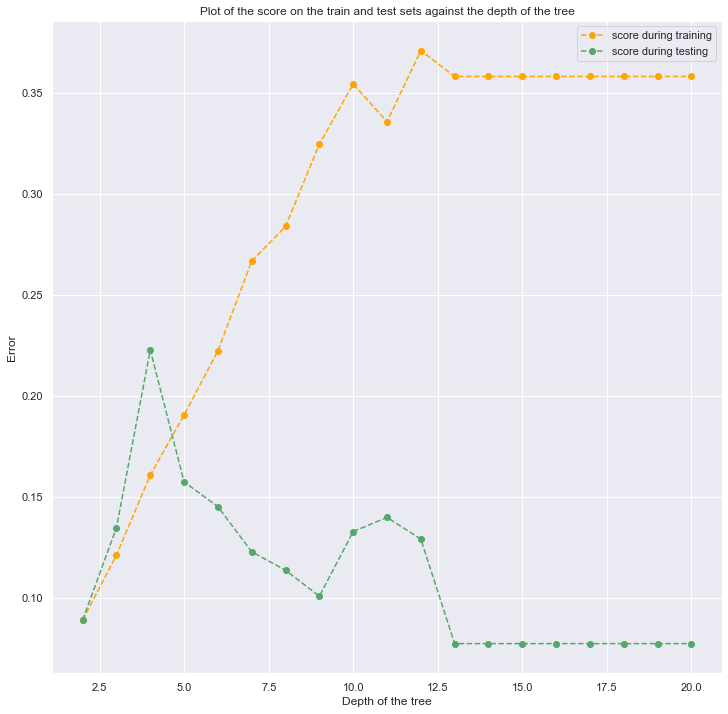

In [72]:
fig = plt.figure(figsize=(12,12))

depthX = np.arange(19) + 2

plt.plot(depthX,err_train[2:], '--o', color='orange', label="score during training")
plt.plot(depthX,err_test[2:], '--o', color='g', label="score during testing")
plt.xlabel('Depth of the tree')
plt.ylabel('Error')
plt.title('Plot of the score on the train and test sets against the depth of the tree')
plt.legend()
plt.show()

The tree starts to overfit really soon, that's an issue belonging to the limitation of the dataset. Let's fit and plot what we have achieved.

In [45]:
clf = DecisionTreeRegressor(max_depth=4, splitter="random",min_samples_leaf=10, random_state=0)
clf = clf.fit(RX_train, Ry_train)

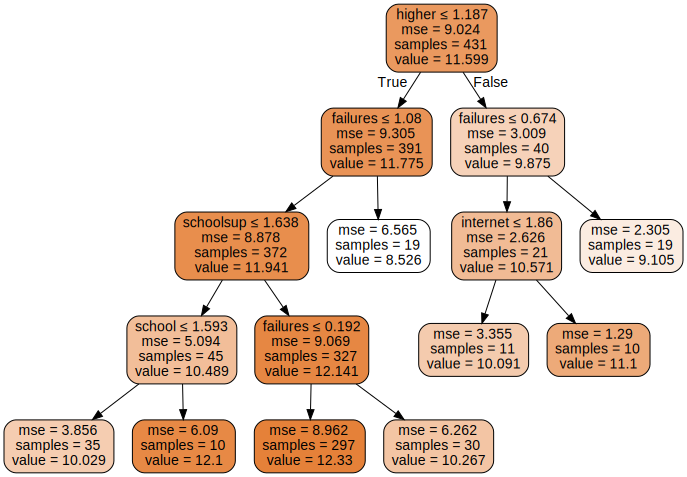

In [928]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file="regr_tree.dot", 
                     feature_names=column_names[:30],  
                     class_names=classNames,  
                     filled=True, rounded=True,  
                     special_characters=True)  
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=column_names[:30],  
                     class_names=classNames,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Random Forest

Random Forest applied to the binar problem

In [59]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=5000)
clf = clf.fit(X_train, y_train)
print("score: ", clf.score(X_test,y_test))


score:  0.7154471544715447


Random Forest applied to the regression problem, using the same approach as before to find the optimal depth

In [76]:
from sklearn.ensemble import RandomForestRegressor

err_train = np.zeros(20)
err_test = np.zeros(20)

for i in range(2, 20):
    clf = RandomForestRegressor(max_depth=i, random_state=0, n_estimators=35)
    clf = clf.fit(RX_train, Ry_train)
    pred = clf.predict(RX_test)

    err_train[i] = mean_squared_error(Ry_train, clf.predict(RX_train))
    err_test[i] = mean_squared_error(Ry_test, pred)

    print("\ndepth of the tree:", i)
    print("error on the training set:", err_train[i])
    print("error on the testing set:", err_test[i])


depth of the tree: 2
error on the training set: 7.430308973633195
error on the testing set: 7.534710231075921

depth of the tree: 3
error on the training set: 6.697763852866995
error on the testing set: 7.139575094659995

depth of the tree: 4
error on the training set: 5.805435236902924
error on the testing set: 6.807462379839207

depth of the tree: 5
error on the training set: 4.903057342129367
error on the testing set: 6.7351323896360284

depth of the tree: 6
error on the training set: 4.055750067398666
error on the testing set: 6.600750276626753

depth of the tree: 7
error on the training set: 3.257055016344541
error on the testing set: 6.666254357011247

depth of the tree: 8
error on the training set: 2.6462312495019504
error on the testing set: 6.810976720297994

depth of the tree: 9
error on the training set: 2.13731371203816
error on the testing set: 6.7579952790316895

depth of the tree: 10
error on the training set: 1.7502868222574162
error on the testing set: 6.8526302687351

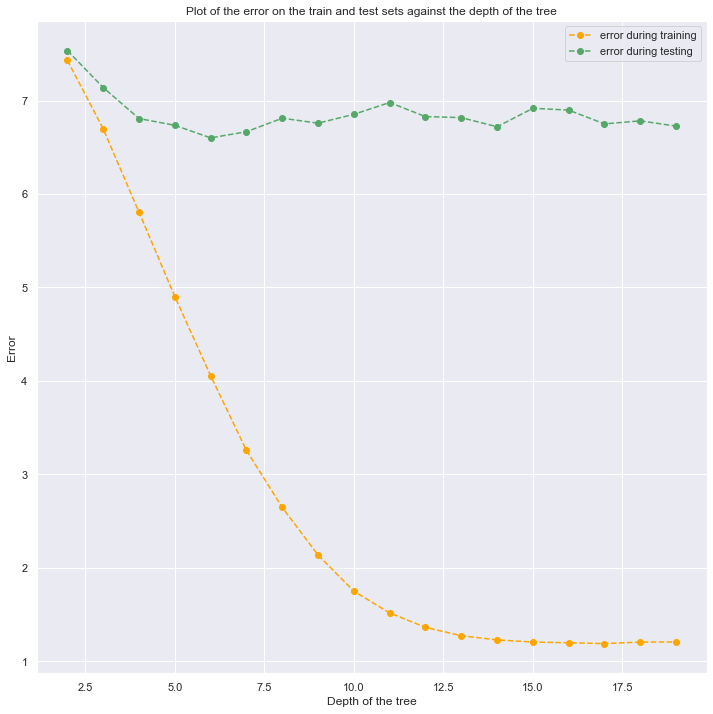

In [77]:
fig = plt.figure(figsize=(12,12))

depthX = np.arange(18) + 2

plt.plot(depthX,err_train[2:], '--o', color='orange', label="error during training")
plt.plot(depthX,err_test[2:], '--o', color='g', label="error during testing")
plt.xlabel('Depth of the tree')
plt.ylabel('Error')
plt.title('Plot of the error on the train and test sets against the depth of the tree')
plt.legend()
plt.show()

In [79]:
clf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=35)
clf = clf.fit(RX_train, Ry_train)
print("score", clf.score(RX_test,Ry_test))

score 0.27470134391349776


# Naive-Bayes 

In [9]:
#preparing the data for naive bayes
from sklearn.model_selection import KFold

X = np.array(merged[:,:30]) #30
y = np.array(merged[:,32])

kf = KFold(n_splits = 5)
kf.get_n_splits(X)

5

In [60]:
#creating a  Gaussian naive-bayes model and training it cross-validation for the first problem

acc = [] 
for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mnb =  GaussianNB()
    mnb.fit(X_train, y_train) 

    #using the trained model to predict the labels on the test set and display the results
    y_pred = mnb.predict(X_test) 
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    print("Gaussian Naive Bayes model accuracy(in %):", accuracy)
    acc.append(accuracy)

print("The mean accuracy: ", np.mean(acc),'%')

Gaussian Naive Bayes model accuracy(in %): 6.7669172932330826
Gaussian Naive Bayes model accuracy(in %): 5.263157894736842
Gaussian Naive Bayes model accuracy(in %): 9.848484848484848
Gaussian Naive Bayes model accuracy(in %): 2.272727272727273
Gaussian Naive Bayes model accuracy(in %): 9.090909090909092
The mean accuracy:  6.648439280018228 %


# Neural network and logistic regression

## Preparing the data


In [66]:
#preparing the data for the neural network and logistic regression
# we do not want to reference the original arrays so we create a copy with the np.array() method
X = np.array(normalized[:,:30]) 

grades = np.array(merged[:,32])
grades[grades < 10] = 0
grades[grades >= 10] = 1

## Regression


Model: "sequential_165"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_179 (Dense)            (None, 28)                868       
_________________________________________________________________
dense_180 (Dense)            (None, 18)                522       
_________________________________________________________________
dense_181 (Dense)            (None, 18)                342       
_________________________________________________________________
dense_182 (Dense)            (None, 1)                 19        
Total params: 1,751
Trainable params: 1,751
Non-trainable params: 0
_________________________________________________________________
Train on 397 samples, validate on 265 samples
Epoch 1/100
397/397 [==============================] - 2s 5ms/step - loss: 135.6588 - val_loss: 119.0894
Epoch 2/100
397/397 [==============================] - 0s 327us/step - loss: 124.4470 - val_loss:

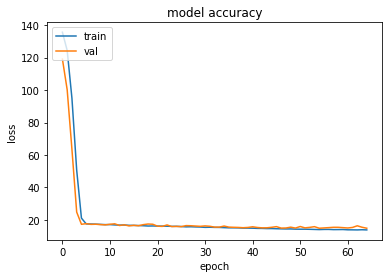

In [57]:
import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense 

#creating training and test sets
X_train, X_test, y_train, y_test = skl.train_test_split(X, y, test_size=0.4, random_state=0)
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.005, patience = 10)

#building the model
NN_model = Sequential()
NN_model.add(Dense(28, input_dim = X_train.shape[1], activation='relu'))
NN_model.add(Dense(18, input_dim = X_train.shape[1], activation='relu'))
NN_model.add(Dense(18, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#compiling the model
NN_model.compile(loss='mean_squared_error',optimizer=keras.optimizers.RMSprop(learning_rate=1e-3))
NN_model.summary()
             
 #fitting the model            
history = NN_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose = 1, validation_data=(X_test, y_test),callbacks = [es])

#plotting training and validation(test) results
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()       

## Logistic regression

Train on 370 samples, validate on 159 samples
Epoch 1/100
370/370 [==============================] - 1s 3ms/step - loss: 0.6646 - acc: 0.6622 - val_loss: 0.6401 - val_acc: 0.7107
Epoch 2/100
370/370 [==============================] - 0s 768us/step - loss: 0.6395 - acc: 0.6919 - val_loss: 0.6259 - val_acc: 0.7107
Epoch 3/100
370/370 [==============================] - 0s 695us/step - loss: 0.6310 - acc: 0.6919 - val_loss: 0.6190 - val_acc: 0.7107
Epoch 4/100
370/370 [==============================] - 0s 700us/step - loss: 0.6266 - acc: 0.6919 - val_loss: 0.6146 - val_acc: 0.7107
Epoch 5/100
370/370 [==============================] - 0s 838us/step - loss: 0.6238 - acc: 0.6919 - val_loss: 0.6118 - val_acc: 0.7107
Epoch 6/100
370/370 [==============================] - 0s 819us/step - loss: 0.6220 - acc: 0.6919 - val_loss: 0.6098 - val_acc: 0.7107
Epoch 7/100
370/370 [==============================] - 0s 861us/step - loss: 0.6207 - acc: 0.6919 - val_loss: 0.6083 - val_acc: 0.7107
Epoch 8/100

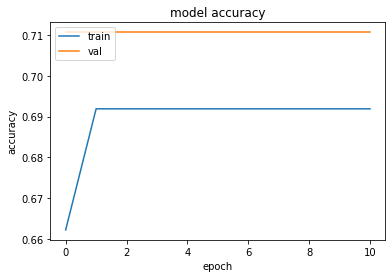

Train on 370 samples, validate on 159 samples
Epoch 1/100
370/370 [==============================] - 1s 3ms/step - loss: 0.6290 - acc: 0.7405 - val_loss: 0.6187 - val_acc: 0.7170
Epoch 2/100
370/370 [==============================] - 0s 753us/step - loss: 0.5989 - acc: 0.7405 - val_loss: 0.6066 - val_acc: 0.7170
Epoch 3/100
370/370 [==============================] - 0s 723us/step - loss: 0.5877 - acc: 0.7405 - val_loss: 0.6013 - val_acc: 0.7170
Epoch 4/100
370/370 [==============================] - 0s 693us/step - loss: 0.5820 - acc: 0.7405 - val_loss: 0.5984 - val_acc: 0.7170
Epoch 5/100
370/370 [==============================] - 0s 716us/step - loss: 0.5783 - acc: 0.7405 - val_loss: 0.5968 - val_acc: 0.7170
Epoch 6/100
370/370 [==============================] - 0s 895us/step - loss: 0.5759 - acc: 0.7405 - val_loss: 0.5958 - val_acc: 0.7170
Epoch 7/100
370/370 [==============================] - 0s 851us/step - loss: 0.5742 - acc: 0.7405 - val_loss: 0.5951 - val_acc: 0.7170
Epoch 8/100

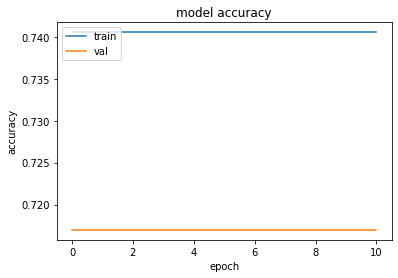

Train on 371 samples, validate on 159 samples
Epoch 1/100
371/371 [==============================] - 1s 3ms/step - loss: 0.6394 - acc: 0.7224 - val_loss: 0.6432 - val_acc: 0.6667
Epoch 2/100
371/371 [==============================] - 0s 835us/step - loss: 0.6140 - acc: 0.7224 - val_loss: 0.6372 - val_acc: 0.6667
Epoch 3/100
371/371 [==============================] - 0s 791us/step - loss: 0.6050 - acc: 0.7224 - val_loss: 0.6351 - val_acc: 0.6667
Epoch 4/100
371/371 [==============================] - 0s 682us/step - loss: 0.6000 - acc: 0.7224 - val_loss: 0.6343 - val_acc: 0.6667
Epoch 5/100
371/371 [==============================] - 0s 679us/step - loss: 0.5969 - acc: 0.7224 - val_loss: 0.6341 - val_acc: 0.6667
Epoch 6/100
371/371 [==============================] - 0s 813us/step - loss: 0.5949 - acc: 0.7224 - val_loss: 0.6341 - val_acc: 0.6667
Epoch 7/100
371/371 [==============================] - 0s 712us/step - loss: 0.5934 - acc: 0.7224 - val_loss: 0.6343 - val_acc: 0.6667
Epoch 8/100

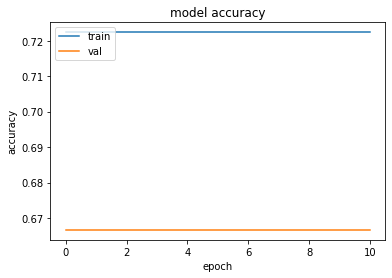

Train on 371 samples, validate on 159 samples
Epoch 1/100
371/371 [==============================] - 1s 3ms/step - loss: 0.6697 - acc: 0.6604 - val_loss: 0.6486 - val_acc: 0.6918
Epoch 2/100
371/371 [==============================] - 0s 661us/step - loss: 0.6546 - acc: 0.6658 - val_loss: 0.6388 - val_acc: 0.6918
Epoch 3/100
371/371 [==============================] - 0s 676us/step - loss: 0.6492 - acc: 0.6658 - val_loss: 0.6334 - val_acc: 0.6918
Epoch 4/100
371/371 [==============================] - 0s 679us/step - loss: 0.6461 - acc: 0.6658 - val_loss: 0.6301 - val_acc: 0.6918
Epoch 5/100
371/371 [==============================] - 0s 671us/step - loss: 0.6441 - acc: 0.6658 - val_loss: 0.6278 - val_acc: 0.6918
Epoch 6/100
371/371 [==============================] - 0s 753us/step - loss: 0.6428 - acc: 0.6658 - val_loss: 0.6260 - val_acc: 0.6918
Epoch 7/100
371/371 [==============================] - 0s 689us/step - loss: 0.6418 - acc: 0.6658 - val_loss: 0.6247 - val_acc: 0.6918
Epoch 8/100

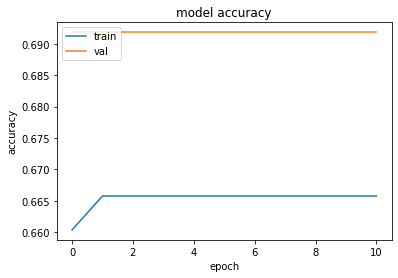

Train on 371 samples, validate on 159 samples
Epoch 1/100
371/371 [==============================] - 1s 3ms/step - loss: 0.6579 - acc: 0.6927 - val_loss: 0.6341 - val_acc: 0.7170
Epoch 2/100
371/371 [==============================] - 0s 682us/step - loss: 0.6268 - acc: 0.7170 - val_loss: 0.6181 - val_acc: 0.7170
Epoch 3/100
371/371 [==============================] - 0s 677us/step - loss: 0.6158 - acc: 0.7170 - val_loss: 0.6105 - val_acc: 0.7170
Epoch 4/100
371/371 [==============================] - 0s 680us/step - loss: 0.6100 - acc: 0.7170 - val_loss: 0.6061 - val_acc: 0.7170
Epoch 5/100
371/371 [==============================] - 0s 779us/step - loss: 0.6065 - acc: 0.7170 - val_loss: 0.6032 - val_acc: 0.7170
Epoch 6/100
371/371 [==============================] - 0s 700us/step - loss: 0.6041 - acc: 0.7170 - val_loss: 0.6011 - val_acc: 0.7170
Epoch 7/100
371/371 [==============================] - 0s 749us/step - loss: 0.6024 - acc: 0.7170 - val_loss: 0.5996 - val_acc: 0.7170
Epoch 8/100

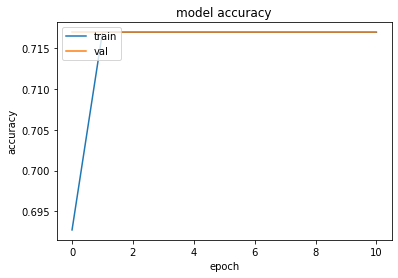

Mean accuracy on test sets: 0.6606494777157519


In [68]:
acc = []

kf = KFold(n_splits = 5)
kf.get_n_splits(X)

#using K-fold cross validation for more reliable results
for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = grades[train_index], grades[test_index]
    
    y_train = keras.utils.to_categorical(y_train, num_classes=2, dtype='float32')
    y_test = keras.utils.to_categorical(y_test, num_classes=2, dtype='float32')
    
    X_train, X_val, y_train, y_val = skl.train_test_split(X_train, y_train, test_size=0.3, random_state=0)
    
    #building the model
    NN_model = Sequential()
    NN_model.add(Dense(2,input_dim = X_train.shape[1], activation='softmax'))
    NN_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adagrad(learning_rate=1e-2), metrics=['acc'])
   
    #using early stopping to avoid overfitting
    es = EarlyStopping(monitor = 'val_loss', min_delta = 0.05, patience = 10)
    history = NN_model.fit(X_train, y_train, epochs = 100, batch_size = 4, verbose = 1, validation_data = (X_val, y_val), callbacks = [es])
    test_acc = NN_model.evaluate(X_test,y_test)
    acc.append(test_acc)
    
    #plotting training and validations results
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

print("Mean accuracy on test sets:", np.mean(acc))


In [61]:
#creating a  Gaussian naive-bayes model and training it cross-validation for the binary problem
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 

acc = []
for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = grades[train_index], grades[test_index]
    
    mnb =  GaussianNB()
    mnb.fit(X_train, y_train) 

    #using the trained model to predict the labels on the test set and display the results
    y_pred = mnb.predict(X_test) 
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    acc.append(accuracy)
    print("Gaussian Naive Bayes model accuracy(in %):", accuracy)
    

print("The mean accuracy: ", np.mean(acc),"%")

Gaussian Naive Bayes model accuracy(in %): 75.18796992481202
Gaussian Naive Bayes model accuracy(in %): 68.42105263157895
Gaussian Naive Bayes model accuracy(in %): 71.96969696969697
Gaussian Naive Bayes model accuracy(in %): 76.51515151515152
Gaussian Naive Bayes model accuracy(in %): 69.6969696969697
The mean accuracy:  72.35816814764183 %


# Alcohol inspection

Merging alcohol consumption during workdays and weekends, summing the two variables in one

In [62]:
#let's merge alcohol, it is part of the same variable
print(column_names)
print(column_names[26:28])
#as we know from here, we are interested in columns 26 and 27
alcohol = merged[:, 26] + merged[:, 27]
print(merged[:, 26])


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Index(['Dalc', 'Walc'], dtype='object')
[1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 5 3 1 1 1 1 1 1
 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 3 2 4 1 1 1 1 1 2 5 1 2 2 1 5 1 1 2 1 1 2 2
 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 3 1 1 2 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 2 1 1 1 1 2 1 3 1 1 2 3 2 1 1 3 1 1 4 1
 1 1 1 2 1 1 1 1 1 4 1 1 3 1 2 2 2 1 2 1 1 1 1 1 1 4 3 1 1 1 3 2 1 1 1 1 1
 1 3 2 1 1 1 1 4 1 2 1 1 2 2 1 1 1 1 5 1 1 1 1 4 1 1 1 1 2 1 1 5 1 1 1 2 1
 1 1 5 1 2 2 1 2 1 2 1 1 1 1 1 1 1 1 3 3 2 1 3 1 1 2 1 2 1 1 1 1 2 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1

Heatmap of grades of students (on the x) and \ntheir overall alcohol consumption during the week (on y)

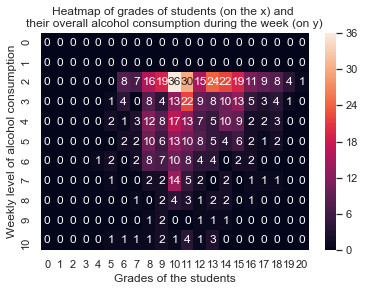

617.0
(617, 33)


In [63]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

values = np.zeros([11,21])
sum=0


for i in range(0,11):
    for j in range(0,21):
        values[i,j] = np.count_nonzero(np.logical_and(merged[:,32] == j, alcohol == i))
        sum += values[i,j]

        
ax = plt.axes()

heatmap = sns.heatmap(values, annot=True, ax=ax)

ax.set_title('Heatmap of grades of students (on the x) and \ntheir overall alcohol consumption during the week (on y)')
ax.set_xlabel("Grades of the students")
ax.set_ylabel("Weekly level of alcohol consumption")
plt.show()

print(sum)
print(merged.shape)